In [1]:
# Python bibliotekos
import numpy as np                  # "numpy" yra biblioteka darbui su didelėmis, daugiamatėmis masyvų ir matricų kolekcijomis bei matematinėmis funkcijomis
import pandas as pd                 # "pandas" suteikia struktūras duomenims ir įrankius jų analizei, pvz., DataFrame
import matplotlib.pyplot as plt     # "matplotlib.pyplot" yra vizualizacijos biblioteka, leidžianti piešti įvairius grafikus
import warnings                     # "warnings" leidžia valdyti įspėjimus: juos ignoruoti, spausdinti, ar klaidinti
import requests                     # "requests" leidžia siųsti HTTP užklausas naudojant Python
from datetime import datetime       # "datetime" modulis suteikia funkcijas darbui su data ir laiku
from bs4 import BeautifulSoup       # "BeautifulSoup" padeda atlikti internetinių puslapių šaltinio kodo (HTML, XML) analizę ir duomenų surinkimą
import time                         # "time" modulis suteikia funkcijas, susijusias su laiku, pvz., laiko gaišimą ar laiko matavimą
import sqlite3                      # "sqlite3" leidžia dirbti su SQLite duomenų bazėmis, atliekant duomenų saugojimo, atnaujinimo ir gavimo operacijas
from numpy.polynomial import Polynomial
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppressing warnings
warnings.filterwarnings('ignore')   # Nustato, kad visi įspėjimai būtų ignoruojami

# Set up Selenium webdriver options
from selenium import webdriver                          # "selenium.webdriver" leidžia automatizuoti veiksmus interneto naršyklėje
from selenium.webdriver.chrome.options import Options   # "Options" leidžia nustatyti konfigūracijas Chrome naršyklės draiveriui

In [5]:
import sqlite3
import pandas as pd

# Pirma lentele
SDB = sqlite3.connect('WEBscr.db')
sql_url = "SELECT * FROM TUrl;"
df1 = pd.read_sql_query(sql_url, con=SDB)

df1['kaina'] = [x.split(';')[-1] for x in df1['params']]   # Išskaidome kainą
df1['kaina_int'] = df1['kaina'].str.replace(' €', '').str.replace(" ", "").str.split('\n').str[-1].astype(int)

# Antra lentele 
sql_autos = "SELECT * FROM TAutos;"
df2 = pd.read_sql_query(sql_autos, con=SDB)

# Issimame gamintojus 'Kita'
df2 = df2.loc[df2['gamintojas'] != '-Kita-']

# Pasiverciame Metus i integerius 
df2 = df2[df2['Pirma registracija'].notna()]
df2['Pirma registracija'] = df2['Pirma registracija'].astype(str)
df2['Pirma registracija'] = df2['Pirma registracija'].str[:4].astype(int)
df2 = df2[df2['Pirma registracija'] > 1980]

# Paverciame ridas i integerius 
df2 = df2[df2['Rida'].notna()]
df2['Rida'] = df2['Rida'].str.replace(' km', '').str.replace(" ", "").astype(int)
df2 = df2[df2['Rida'] < 500000]
df2 = df2[df2['Rida'] > 1]
df2['Rida'] = np.ceil(df2['Rida'] / 5000)* 5000

SDB.close()  

# Pakeiciame stulpeliu pavadinimus 
df2 = df2.rename(columns={'Kuro tipas': 'kuras', 'Pirma registracija': 'metai', 'Kėbulo tipas':'kebulas'})


# Sujungimas pagal 'id'
df2 = pd.merge(df1[['id', 'kaina_int']], df2, on='id', how='inner')
df2.head()


,id,kaina_int,gamintojas,metai,kuras,kebulas,Durų skaičius,Pavarų dėžė,id_,auto,...,Pirmosios registracijos šalis,Kėbulo numeris (VIN),Euro standartas,"CO₂ emisija, g/km",Defektai,Pagaminimo data,Vairo padėtis,Registracijos data,Ilgis,Aukštis
0,25604691,18900,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",...,JAV,JC1NFAEK2H0110190,Euro 6,148 g/km,None,None,None,None,None,None
1,25604691,18900,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",...,JAV,JC1NFAEK...\nRodyti,Euro 6,148 g/km,None,None,None,None,None,None
2,25604691,18900,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",...,JAV,JC1NFAEK...\nRodyti,Euro 6,148 g/km,None,None,None,None,None,None
3,25604691,18900,Abarth,2017,Benzinas,Kabrioletas,2/3,Mechaninė,Skelbimo ID: A25604691,"Abarth 124 Spider, 1.4 l., kabrioletas",...,JAV,JC1NFAEK...\nRodyti,Euro 6,148 g/km,None,None,None,None,None,None
4,25741890,9100,Acura,2013,Benzinas,Visureigis / Krosoveris,4/5,Automatinė,Skelbimo ID: A25741890,"Acura ZDX, 3.7 l., visureigis / krosoveris",...,None,None,None,None,None,None,None,None,None,None


In [6]:
# gamintojas = input('Nurodykite gamintoją')
# rida = input('Nurodykite ridą')
# metai = input('Nurodykite metus')
# kebulas = input('Nurodykite kebulą')
# kuras = input('Nurodykite kuro tipą')

# Susikuriame vartotojo duodama zodyna
# vartotojo_ivestis = {'gamintojas':gamintojas, 'modelis':modelis, 'rida':rida, 'metai':metai, 'kebulas':kebulas, 'kuras':kuras}

vartotojo_ivestis = {'gamintojas':'Audi', 'rida':'220000', 'metai':'2009', 'kebulas':'Universalas', 'kuras':'Benzinas'}
print(vartotojo_ivestis)

{'gamintojas': 'Audi', 'rida': '220000', 'metai': '2009', 'kebulas': 'Universalas', 'kuras': 'Benzinas'}


gamintojas 15935.172826652784
kebulas 10929.38125
kuras 18501.48045602606
metu poly 5756.4108810424805


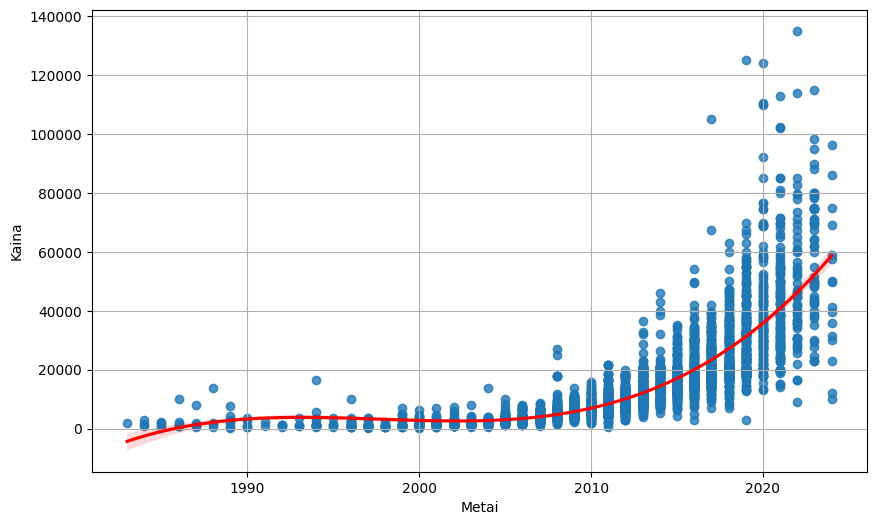

ridos poly 13051.360591359029


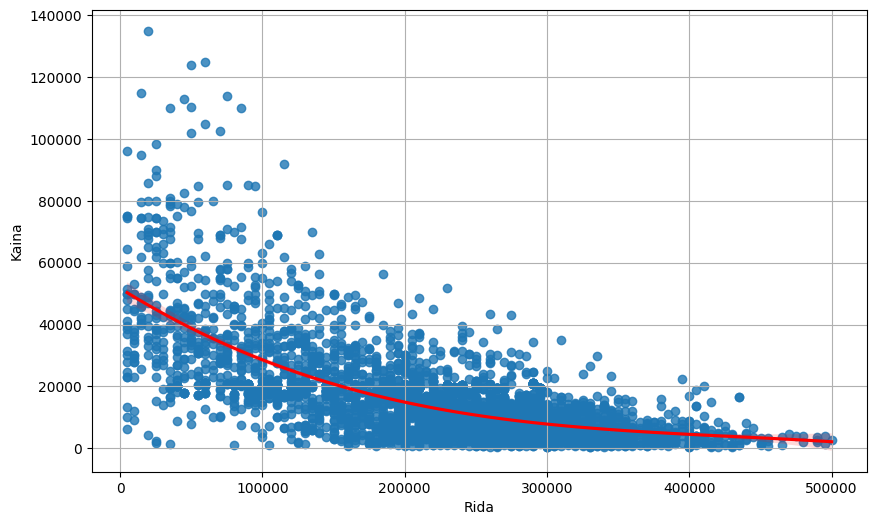

12834.76120101607


In [7]:
# Gamintojas: apskaiciuojame vidutine gamintojo kaina
vgamintojas = vartotojo_ivestis['gamintojas']
df_gamintojas = df2.loc[df2['gamintojas'] == vgamintojas]
vid_gamintojas = df_gamintojas['kaina_int'].mean()
print('gamintojas', vid_gamintojas)


# Kebulas: apskaiciuojame vidutine kebulo kaina (ir gamintojo)
vkebulas = vartotojo_ivestis['kebulas']
df_kebulas = df2.loc[(df2['kebulas'] == vkebulas) & (df2['gamintojas'] == vgamintojas)]
df_kebulas.head(50)
vid_kebulas = df_kebulas['kaina_int'].mean()
print('kebulas', vid_kebulas)

# Kuras: apskaiciuojame vidutine kuro kaina (ir gamintojo)
vkuras = vartotojo_ivestis['kuras']
df_kuras = df2.loc[(df2['kuras'] == vkuras) & (df2['gamintojas'] == vgamintojas)]
vid_kuras = df_kuras['kaina_int'].mean()
print('kuras', vid_kuras)

# Metai: apskaiciuojame regr. koficienta 
DF1 = df_gamintojas[['kaina_int','metai']]
coefs = np.polyfit(x=DF1['metai'], y=DF1['kaina_int'], deg=3)        # koeficientai mažėjančiai!
fit_metai = Polynomial(coefs[::-1])                                  # koeficientai didėjančiai!
years = int(vartotojo_ivestis['metai'])
r = fit_metai(years)
print('metu poly', r)

plt.figure(figsize=(10, 6))
sns.regplot(x='metai', y='kaina_int', data=DF1, line_kws={"color": "red"}, order=3)

plt.grid()
plt.xlabel('Metai')
plt.ylabel('Kaina')
plt.show()


# Rida: apskaiciuojame regt. koficienta 
DF2 = df_gamintojas[['kaina_int','Rida']]
coefs = np.polyfit(x=DF2['Rida'], y=DF2['kaina_int'], deg=3)        # koeficientai mažėjančiai!
fit_metai = Polynomial(coefs[::-1])                                  # koeficientai didėjančiai!
rida2 = int(vartotojo_ivestis['rida'])
q = fit_metai(rida2)
print('ridos poly', q)

plt.figure(figsize=(10, 6))
sns.regplot(x='Rida', y='kaina_int', data=DF2, line_kws={"color": "red"}, order=3)


plt.grid()
plt.xlabel('Rida')
plt.ylabel('Kaina')
plt.show()

# Apskaiciuojame bendra prognozuojama kaina 

prog_kaina = (q+r+vid_kuras+vid_kebulas+vid_gamintojas)/5
print(prog_kaina)